<center><h1>Hu_Yaqi_HW1</h1></center>
<br>
<center><h1>USCID: 7191264555</h1></center>
<br>
<center><font size="4">Vertebral Column Data</font></center>

### (a) Download Data

Package imports

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, DistanceMetric
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, ConfusionMatrixDisplay

Get the Vertebral Column Data Set

In [16]:
path = '../data/vertebral_column_data/column_2C.dat'

patient_data = pd.read_csv(path, sep = ' ', header=None)

column_names = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class']

patient_data.columns = column_names

# Total 310 patient cases
print(patient_data.head(), patient_data.shape)

   pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope   
0             63.03        22.55                  39.61         40.48  \
1             39.06        10.06                  25.02         29.00   
2             68.83        22.22                  50.09         46.61   
3             69.30        24.65                  44.31         44.64   
4             49.71         9.65                  28.32         40.06   

   pelvic_radius  degree_spondylolisthesis class  
0          98.67                     -0.25    AB  
1         114.41                      4.56    AB  
2         105.99                     -3.53    AB  
3         101.87                     11.21    AB  
4         108.17                      7.92    AB   (310, 7)


### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

I make a subplot to let it looks better, with a 2 rows and 3 columns graph

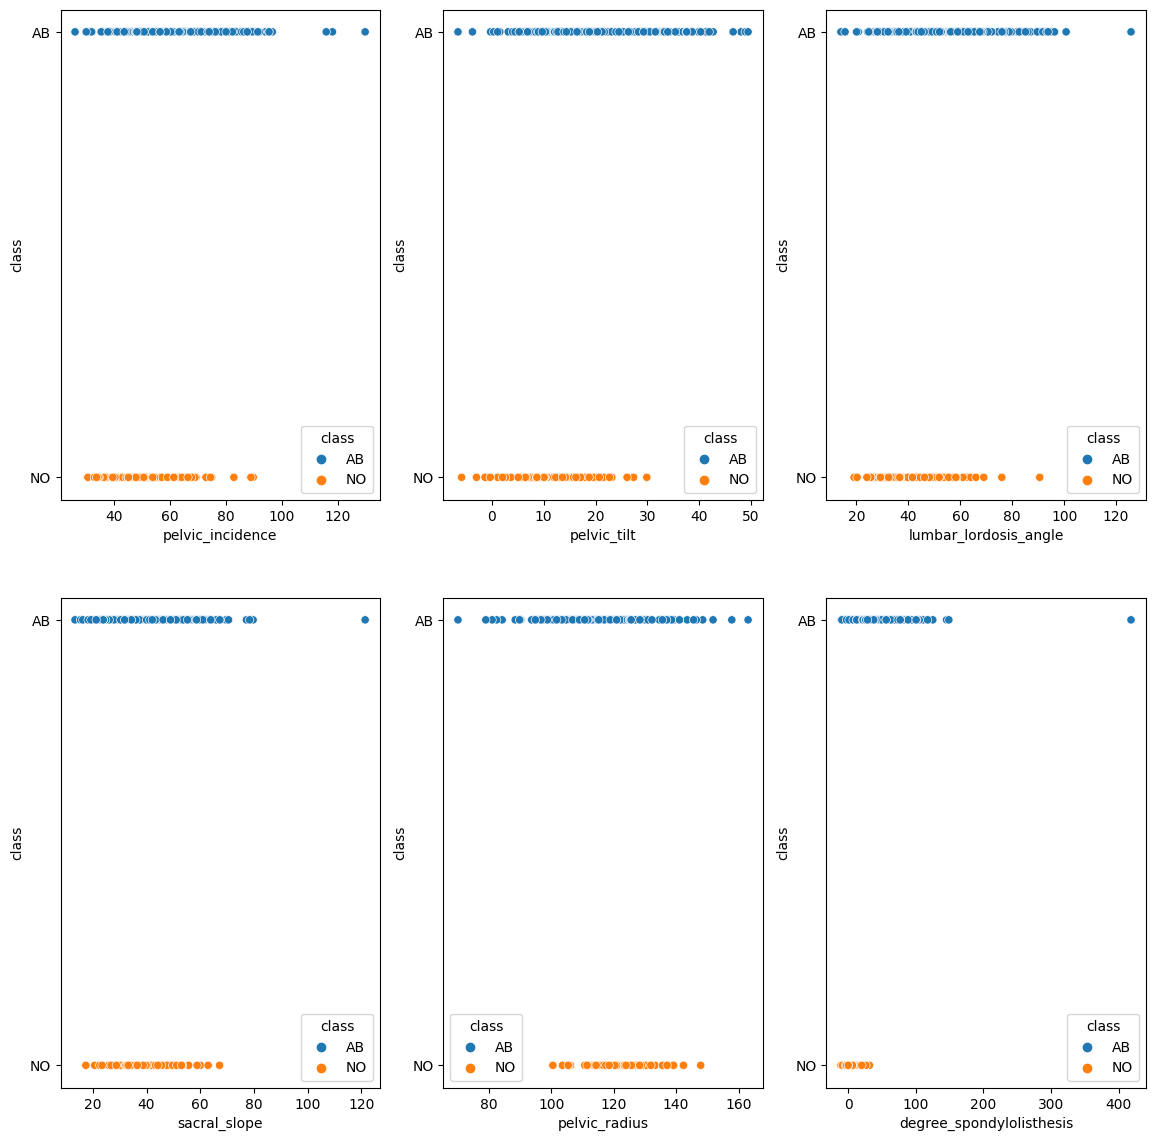

In [17]:
x_position = 0
y_position = 0

fig, axis = plt.subplots(2, 3, figsize=(14, 14))

for attri in patient_data.columns:
    # print([x_position, y_position])
    if attri != 'class':
        sns.scatterplot(x=patient_data[attri], y=patient_data['class'], hue=patient_data['class'], ax=axis[x_position, y_position])
        if y_position == 2:
            y_position = 0
            x_position = 1
        else:
            y_position += 1
plt.show()

##### Another way of doing this is using pairplot with kind = 'scatter'

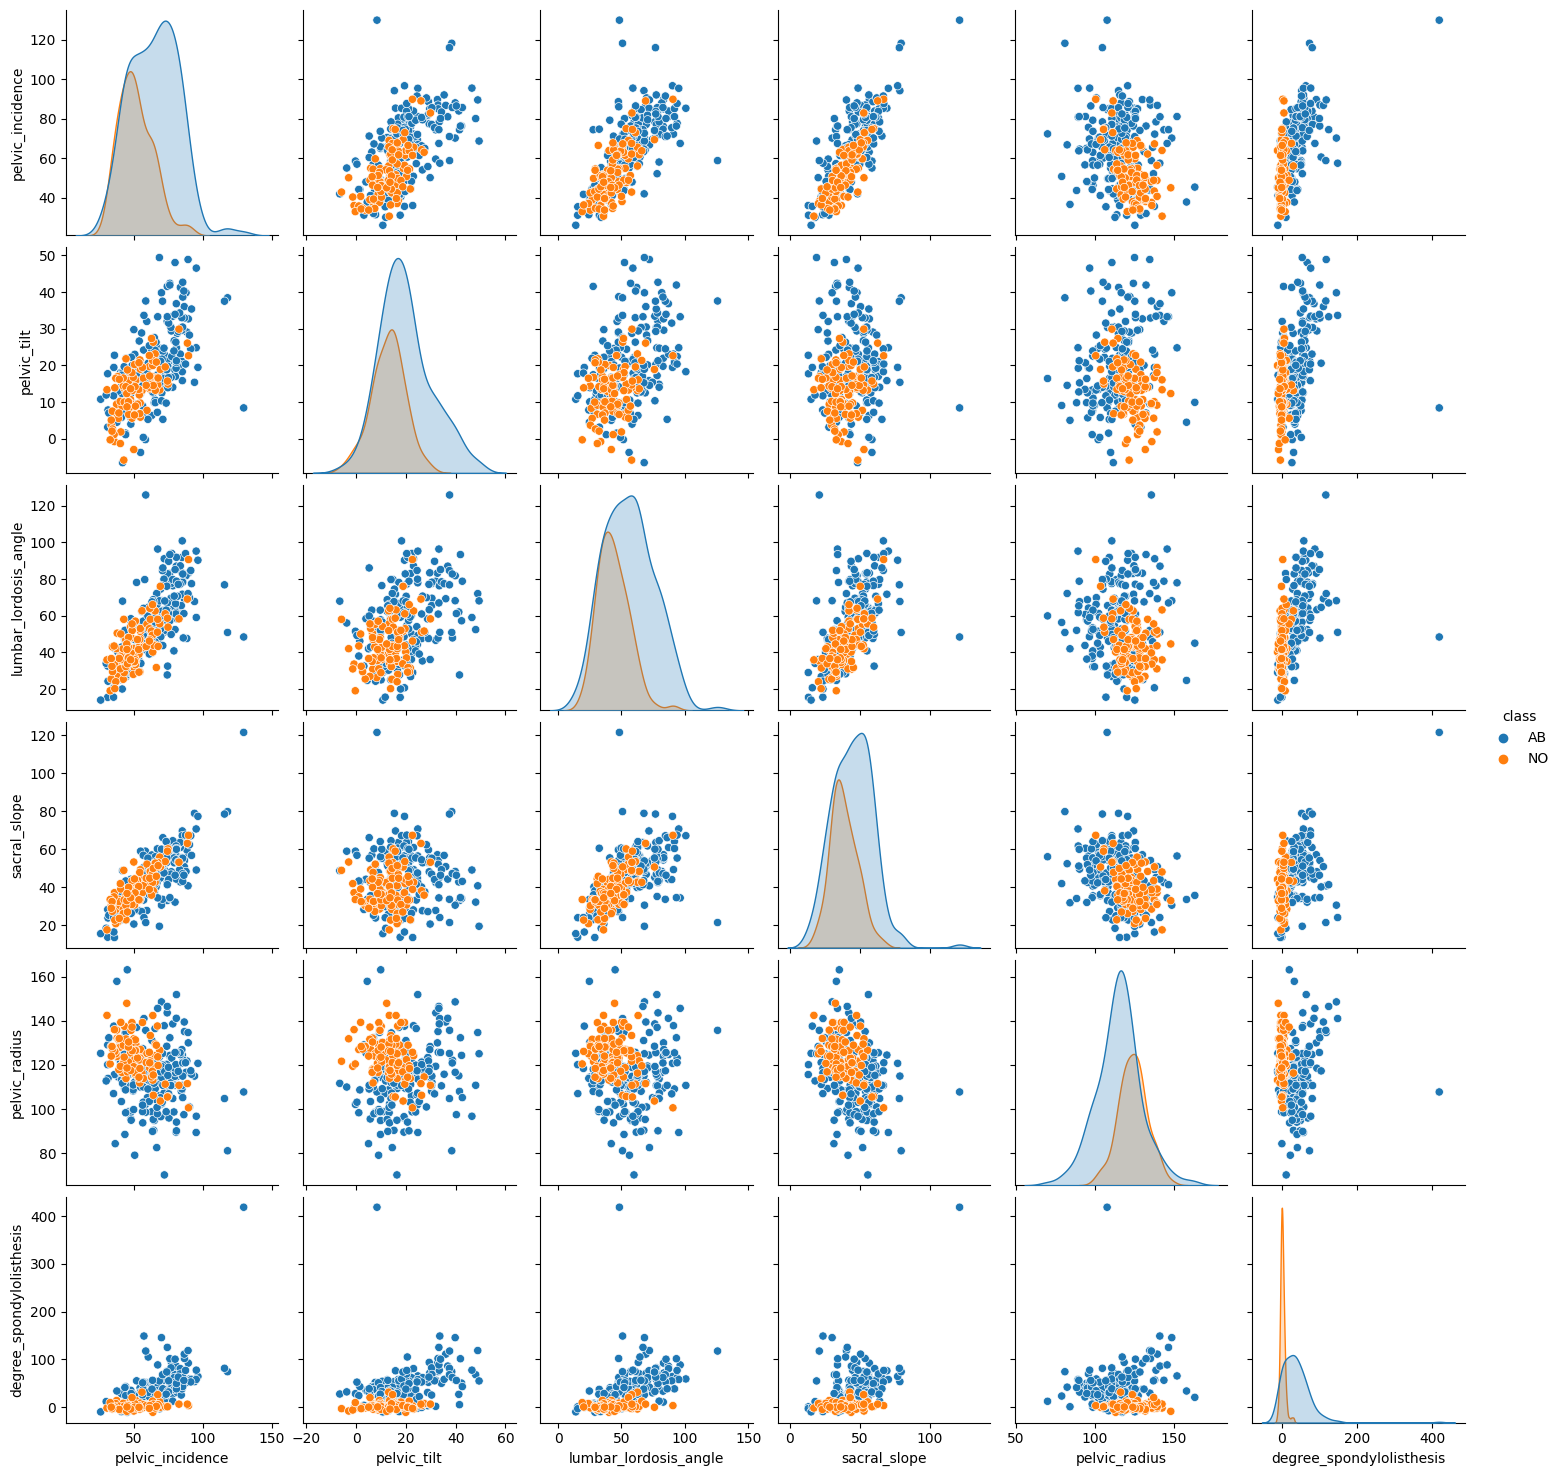

In [18]:
sns.pairplot(patient_data, kind='scatter', diag_kind='kde', hue='class')
plt.show()

#### ii. Boxplots

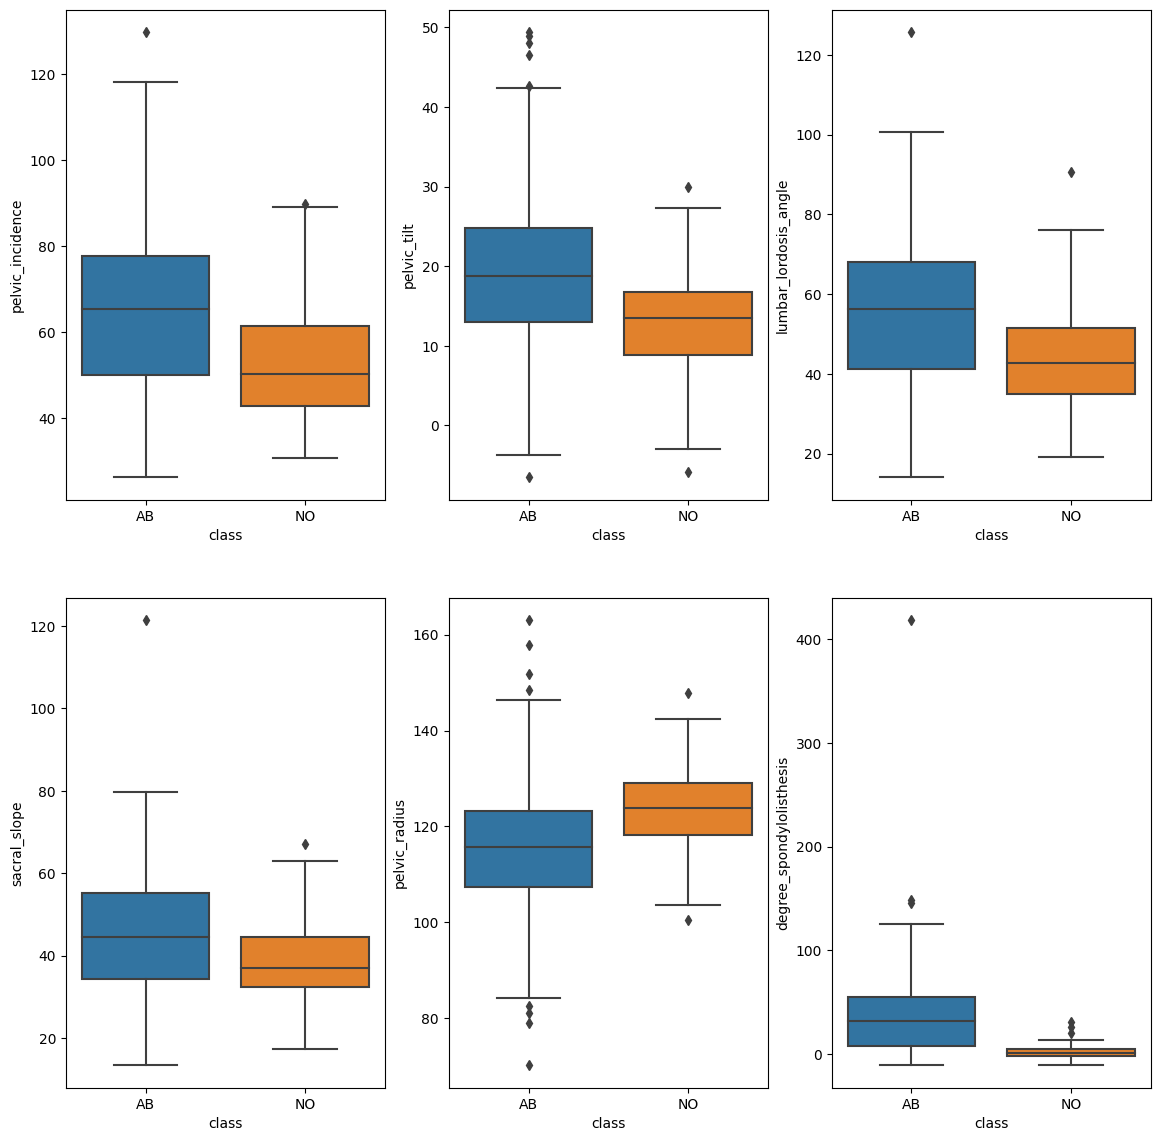

In [19]:
x_position = 0
y_position = 0

fig, axis = plt.subplots(2, 3, figsize=(14, 14))

for attri in patient_data.columns:
    if attri != 'class':
        sns.boxplot(x=patient_data['class'], y=patient_data[attri], ax=axis[x_position, y_position])
        if y_position == 2:
            y_position = 0
            x_position = 1
        else:
            y_position += 1
plt.show()       

#### iii. Split Data Set

Training set will have 210 cases, and Testing set will have 100 in total

In [20]:
# Here I let AB = 1 and NO = 0, to prepare for the training

patient_data['class'] = patient_data['class'].replace({'AB':1, 'NO':0})

part_a = patient_data[patient_data['class'] == 0][:70]
# print(part_a)
part_b = patient_data[patient_data['class'] == 1][:140]
# print(part_b)

# 210 cases for training
train_set = pd.concat([part_a, part_b])
print('This is the training set, 210 cases')
print(train_set.head(), train_set.shape)

print('\n--------------------------------------------\n')

# 100 cases for testing
# print(patient_data.index.isin(train_set.index))
print('This is the testing set, 100 cases')
test_set = patient_data.loc[~patient_data.index.isin(train_set.index)]
print(test_set.head(), test_set.shape)

This is the training set, 210 cases
     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope   
210             38.51        16.96                  35.11         21.54  \
211             54.92        18.97                  51.60         35.95   
212             44.36         8.95                  46.90         35.42   
213             48.32        17.45                  48.00         30.87   
214             45.70        10.66                  42.58         35.04   

     pelvic_radius  degree_spondylolisthesis  class  
210         127.63                      7.99      0  
211         125.85                      2.00      0  
212         129.22                      4.99      0  
213         128.98                     -0.91      0  
214         130.18                     -3.39      0   (210, 7)

--------------------------------------------

This is the testing set, 100 cases
     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope   
140             69.56  

### (c) Classification

#### i. Euclidean Metric

In [21]:
# Here I suppose k nearest neighbors k is 1, k will vary in below questions
knn_classification = KNeighborsClassifier(n_neighbors=1, metric='euclidean')

#### ii. Test Data

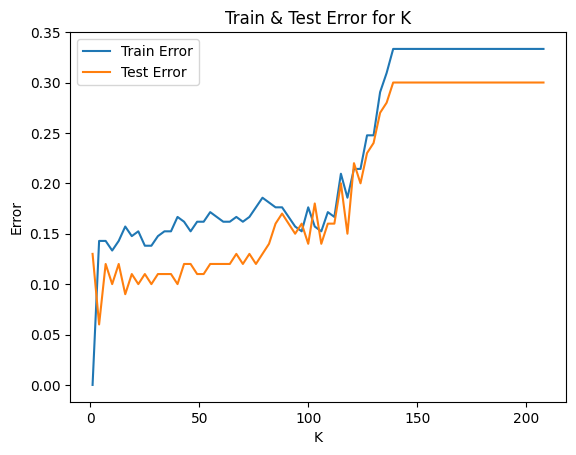

This is the best k for train: 1
This is the best k for test: 4

--------------------------------------------

This is the best training error for euclidean 0.0
This is the best test error for euclidean: 0.06000000000000005

--------------------------------------------

For training set, as the training error is 0, all of them is 1, no need to calculate

--------------------------------------------

For testing set, the outcome is as below
This is confusion matrix:
 [[25  5]
 [ 1 69]]


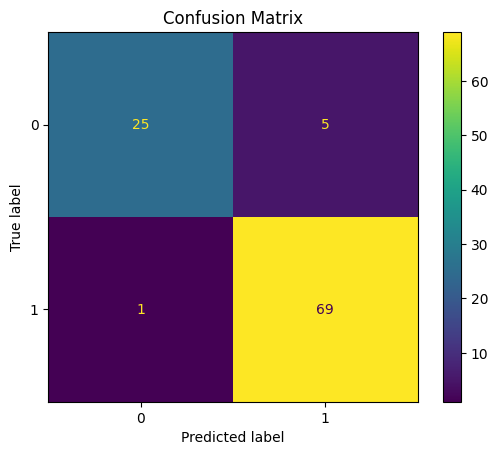

This is true positive rate: 0.9857142857142858
This is true negative rate: 0.8333333333333334
This is Presicion value: 0.9324324324324325
This is F1 score: 0.9583333333333333


In [22]:
train_errors = []
test_errors = []
k_values = list(range(208, 0, -3))
best_test_k = 0
best_train_k = 0
best_test_error = float('inf')
best_train_error_eu = float('inf')

# print(k_values)

for k_ins in k_values:
    knn_classification = KNeighborsClassifier(n_neighbors=k_ins, metric='euclidean')
    # Last column is class, we need to avoid it.
    # .fit(x, y, degree)

    #Training
    knn_classification.fit(train_set.iloc[:, :-1], train_set['class'])

    # Prediction
    train_pred = knn_classification.predict(train_set.iloc[:, :-1])
    test_pred = knn_classification.predict(test_set.iloc[:, :-1])

    train_error = 1 - accuracy_score(train_set['class'], train_pred)
    test_error = 1 - accuracy_score(test_set['class'], test_pred)
    
    # Select best K from all ks
    if test_error < best_test_error:
        best_test_error = test_error
        best_test_k = k_ins
    
    if train_error < best_train_error_eu:
        best_train_error_eu = train_error
        best_train_k = k_ins
    
    train_errors.append(train_error)
    test_errors.append(test_error)

plt.plot(k_values, train_errors, label = 'Train Error')
plt.plot(k_values, test_errors, label = 'Test Error')

plt.legend()

plt.xlabel('K')
plt.ylabel('Error')
plt.title('Train & Test Error for K')

plt.show()

print(f'This is the best k for train:', best_train_k)

print(f'This is the best k for test:', best_test_k)

print('\n--------------------------------------------\n')

print(f'This is the best training error for euclidean', best_train_error_eu)

print(f'This is the best test error for euclidean:', best_test_error)

print('\n--------------------------------------------\n')

best_knn = KNeighborsClassifier(n_neighbors=best_test_k, metric='euclidean')
best_knn.fit(train_set.iloc[:, :-1], train_set['class'])

best_pred = best_knn.predict(test_set.iloc[:, :-1])

conf_matrix = confusion_matrix(test_set['class'], best_pred)
tn, fp, fn, tp =conf_matrix.ravel()

t_positive_rate = tp / (tp + fn)
t_negative_rate = tn / (tn + fp)

precision = precision_score(test_set['class'], best_pred)

f1_value = f1_score(test_set['class'], best_pred)

print('For training set, as the training error is 0, all of them is 1, no need to calculate')

print('\n--------------------------------------------\n')

print('For testing set, the outcome is as below')
print(f'This is confusion matrix:\n', conf_matrix)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_knn.classes_).plot()
plt.title('Confusion Matrix')
plt.show()

print(f'This is true positive rate:', t_positive_rate)

print(f'This is true negative rate:', t_negative_rate)

print(f'This is Presicion value:', precision)

print(f'This is F1 score:', f1_value)


#### iii. Learning Curve

This is the best test error: 0.07999999999999996


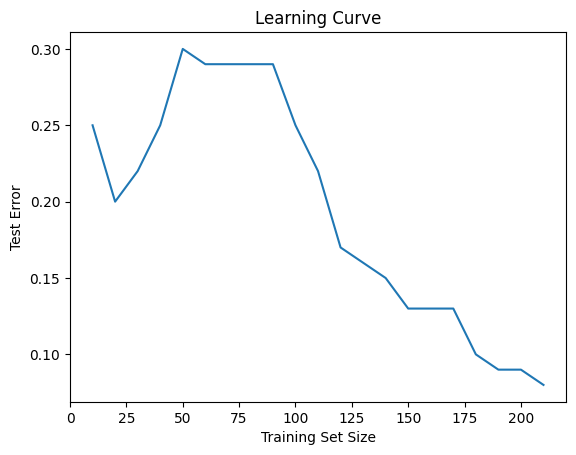

In [23]:
test_errors = []
N_values = list(range(10, 220, 10))
# print(N_values)
best_k = 0
best_test_error = float('inf')

for t_size in N_values:
    part_a = patient_data[patient_data['class'] == 0][:int(t_size/3)]
    # print(part_a)
    part_b = patient_data[patient_data['class'] == 1][:t_size - int(t_size/3)]
    # print(part_b)

    sub_train_set = pd.concat([part_a, part_b])

    k_values = list(range(1, t_size, 5))
    best_test_error = float('inf')
    for k_ins in k_values:
        knn_classification = KNeighborsClassifier(n_neighbors=k_ins, metric='euclidean')

        #Training
        knn_classification.fit(sub_train_set.iloc[:, :-1], sub_train_set['class'])

        # Prediction
        
        test_pred = knn_classification.predict(test_set.iloc[:, :-1])

        test_error = 1 - accuracy_score(test_set['class'], test_pred)
        
        best_test_error = min(best_test_error, test_error)
    
    test_errors.append(best_test_error)

print(f'This is the best test error:', min(test_errors))

plt.plot(N_values, test_errors)
plt.xlabel('Training Set Size')
plt.ylabel('Test Error')
plt.title('Learning Curve')
plt.show()

    
    

### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

This is the best k value: 6
This is the best test error: 0.10999999999999999


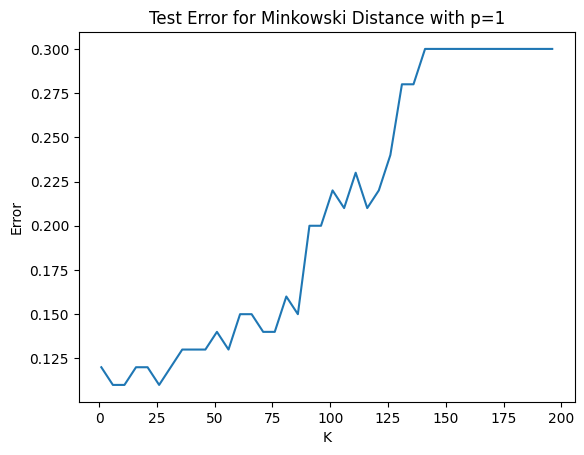

In [24]:
test_errors = []
k_values = list(range(1, 200, 5))
# print(k_values)
best_k = 0
best_test_error = float('inf')

# print(k_values)

for k_ins in k_values:
    knn_classification = KNeighborsClassifier(n_neighbors=k_ins, metric='minkowski', p=1)
    # Last column is class, we need to avoid it.
    # .fit(x, y, degree)

    #Training
    knn_classification.fit(train_set.iloc[:, :-1], train_set['class'])

    # Prediction
    test_pred = knn_classification.predict(test_set.iloc[:, :-1])

    test_error = 1 - accuracy_score(test_set['class'], test_pred)
    
    # Select best K from all ks
    if test_error < best_test_error:
        best_test_error = test_error
        best_k = k_ins
    
    test_errors.append(test_error)

print(f'This is the best k value:', best_k)
print(f'This is the best test error:', best_test_error)

plt.plot(k_values, test_errors)

plt.xlabel('K')
plt.ylabel('Error')
plt.title('Test Error for Minkowski Distance with p=1')

plt.show()

##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

This is the best p value: 3.9810717055349722 and the corresponding log_10(p) is 0.6
This is the best test error: 0.06000000000000005


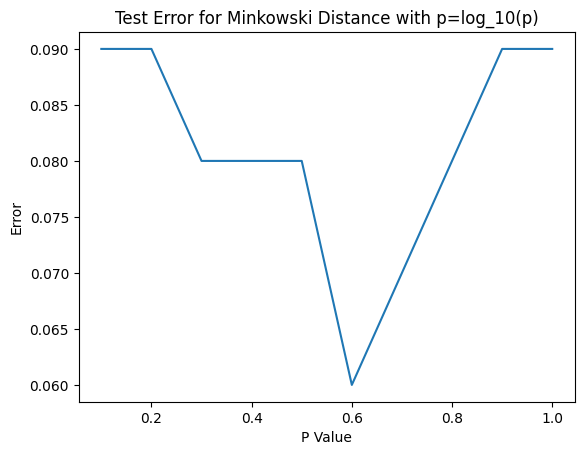

In [25]:
# For this, our manhanttan distance best k is 6, so here k is 6.

test_errors = []
k = 6
p_values = [10**x for x in np.arange(0.1, 1.1, 0.1)]
best_test_error = float('inf')

# print(k_values)

for p_ins in p_values:
    knn_classification = KNeighborsClassifier(n_neighbors=6, metric='minkowski', p=p_ins)
    # Last column is class, we need to avoid it.
    # .fit(x, y, degree)

    #Training
    knn_classification.fit(train_set.iloc[:, :-1], train_set['class'])

    # Prediction
    test_pred = knn_classification.predict(test_set.iloc[:, :-1])

    test_error = 1 - accuracy_score(test_set['class'], test_pred)
    
    # Select best K from all ks
    if test_error < best_test_error:
        best_test_error = test_error
        best_p = p_ins
    
    test_errors.append(test_error)

print(f'This is the best p value:', best_p, 'and the corresponding log_10(p) is 0.6')
print(f'This is the best test error:', best_test_error)

plt.plot(np.arange(0.1, 1.1, 0.1), test_errors)

plt.xlabel('P Value')
plt.ylabel('Error')
plt.title('Test Error for Minkowski Distance with p=log_10(p)')

plt.show()

##### C. Chebyshev Distance With p -> infinity.

This is the best k value: 16
This is the best test error: 0.07999999999999996


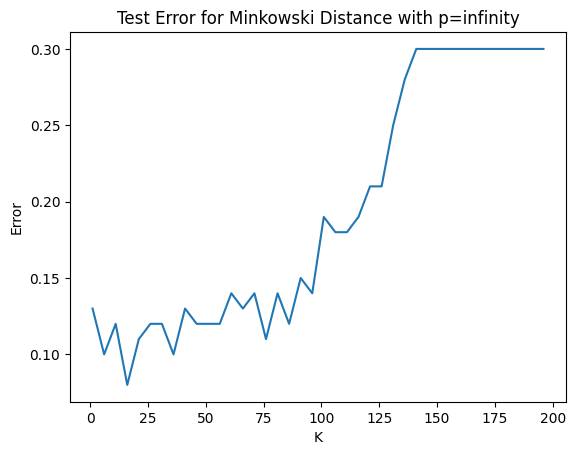

In [26]:
test_errors = []
k_values = list(range(1, 200, 5))
best_k = 0
best_test_error = float('inf')

# print(k_values)

for k_ins in k_values:
    knn_classification = KNeighborsClassifier(n_neighbors=k_ins, metric='minkowski', p=float('inf'))

    #Training
    knn_classification.fit(train_set.iloc[:, :-1], train_set['class'])

    # Prediction
    test_pred = knn_classification.predict(test_set.iloc[:, :-1])

    test_error = 1 - accuracy_score(test_set['class'], test_pred)
    
    # Select best K from all ks
    if test_error < best_test_error:
        best_test_error = test_error
        best_k = k_ins
    
    test_errors.append(test_error)

print(f'This is the best k value:', best_k)
print(f'This is the best test error:', best_test_error)

plt.plot(k_values, test_errors)

plt.xlabel('K')
plt.ylabel('Error')
plt.title('Test Error for Minkowski Distance with p=infinity')

plt.show()

#### ii. Mahalanobis Distance.

This is the best k value: 1
This is the best test error: 0.17000000000000004


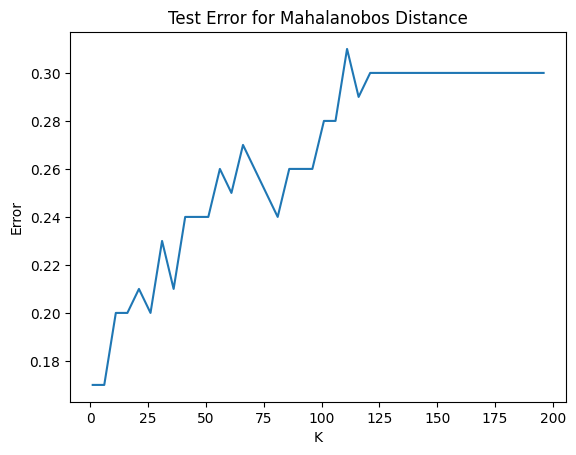

In [27]:
# The one with inverse of the covariance
test_errors = []
k_values = list(range(1, 200, 5))
# print(k_values)
best_k = 0
best_test_error = float('inf')

# print(k_values)

# We need to calculate the covariance and it inverse of data
covariance = np.cov(train_set.iloc[:, :-1], rowvar=False)
inv_covariance = np.linalg.inv(covariance)

for k_ins in k_values:
    knn_classification = KNeighborsClassifier(n_neighbors=k_ins, algorithm='brute', metric='mahalanobis', metric_params={'VI': inv_covariance})

    #Training
    knn_classification.fit(train_set.iloc[:, :-1], train_set['class'])

    # Prediction
    test_pred = knn_classification.predict(test_set.iloc[:, :-1])

    test_error = 1 - accuracy_score(test_set['class'], test_pred)
    
    # Select best K from all ks
    if test_error < best_test_error:
        best_test_error = test_error
        best_k = k_ins
    
    test_errors.append(test_error)

print(f'This is the best k value:', best_k)
print(f'This is the best test error:', best_test_error)

plt.plot(k_values, test_errors)

plt.xlabel('K')
plt.ylabel('Error')
plt.title('Test Error for Mahalanobos Distance')

plt.show()

### (e) Weighted Decision

This is the distance type: euclidean
This is the best k value: 6
This is the best test error: 0.07999999999999996


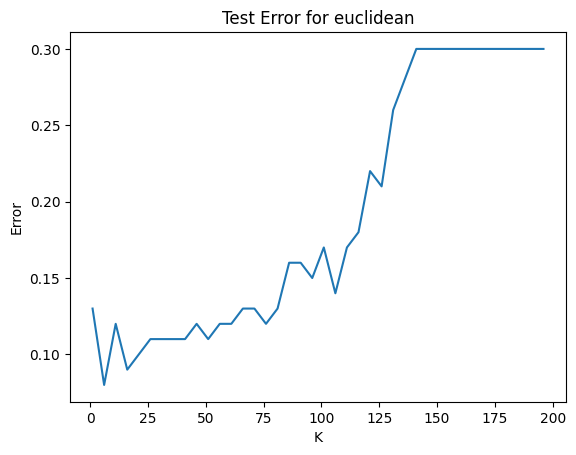

This is the distance type: manhattan
This is the best k value: 6
This is the best test error: 0.10999999999999999


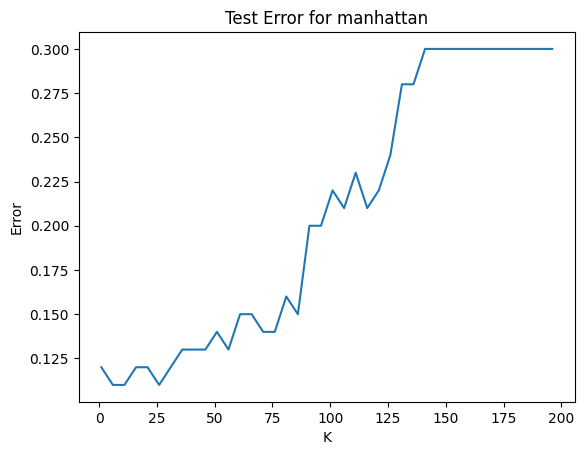

This is the distance type: chebyshev
This is the best k value: 16
This is the best test error: 0.07999999999999996


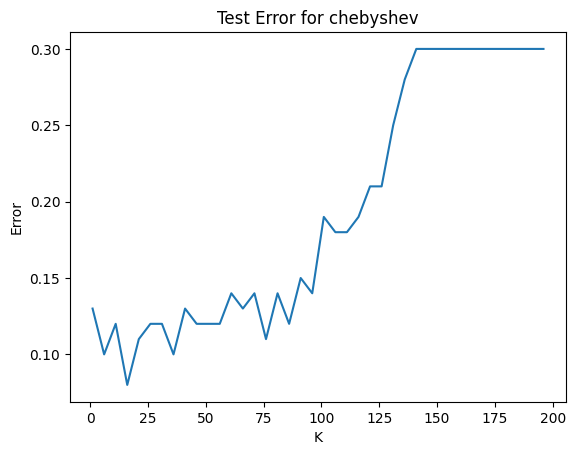

In [28]:
k_values = list(range(1, 200, 5))
distance_matrix = ['euclidean', 'manhattan', 'chebyshev']
# num is for subplot count
num = 1

for ds_m in distance_matrix:
    best_k = 0
    test_errors = []
    best_test_error = float('inf')
    for k_ins in k_values:
        knn_classification = KNeighborsClassifier(n_neighbors=k_ins, metric=ds_m)
        # Last column is class, we need to avoid it.
        # .fit(x, y, degree)

        #Training
        knn_classification.fit(train_set.iloc[:, :-1], train_set['class'])

        # Prediction
        test_pred = knn_classification.predict(test_set.iloc[:, :-1])

        test_error = 1 - accuracy_score(test_set['class'], test_pred)
        
        # Select best K from all ks
        if test_error < best_test_error:
            best_test_error = test_error
            best_k = k_ins
        
        test_errors.append(test_error)

    print(f'This is the distance type:', ds_m)
    print(f'This is the best k value:', best_k)
    print(f'This is the best test error:', best_test_error)
    
    plt.plot(k_values, test_errors)

    plt.xlabel('K')
    plt.ylabel('Error')
    plt.title('Test Error for ' + str(ds_m))

    plt.show()
    num += 1

### (f) Training Error Rate

#### The Lowest Training Error Rate I get in this homework is 0, with euclidean distance and k=1. Because it perfectly fit all the points (overfitting indeed), and the training error is 0.

---

### Reference

##### 1. I Get the Distances from the wikipedia:
https://en.wikipedia.org/wiki/Mahalanobis_distance \
https://en.wikipedia.org/wiki/Euclidean_distance \
https://simple.wikipedia.org/wiki/Manhattan_distance \
https://en.wikipedia.org/wiki/Chebyshev_distance \
https://en.wikipedia.org/wiki/Minkowski_distance 

##### 2. Also, get some information from 
https://seaborn.pydata.org/tutorial.html \
https://numpy.org/learn/ \
https://blog.csdn.net/haveanybody/article/details/112007709 \
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html#sklearn.metrics.DistanceMetric.get_metric \
https://vimsky.com/examples/detail/python-ex-sklearn.neighbors.dist_metrics-DistanceMetric-get_metric-method.html